In [5]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

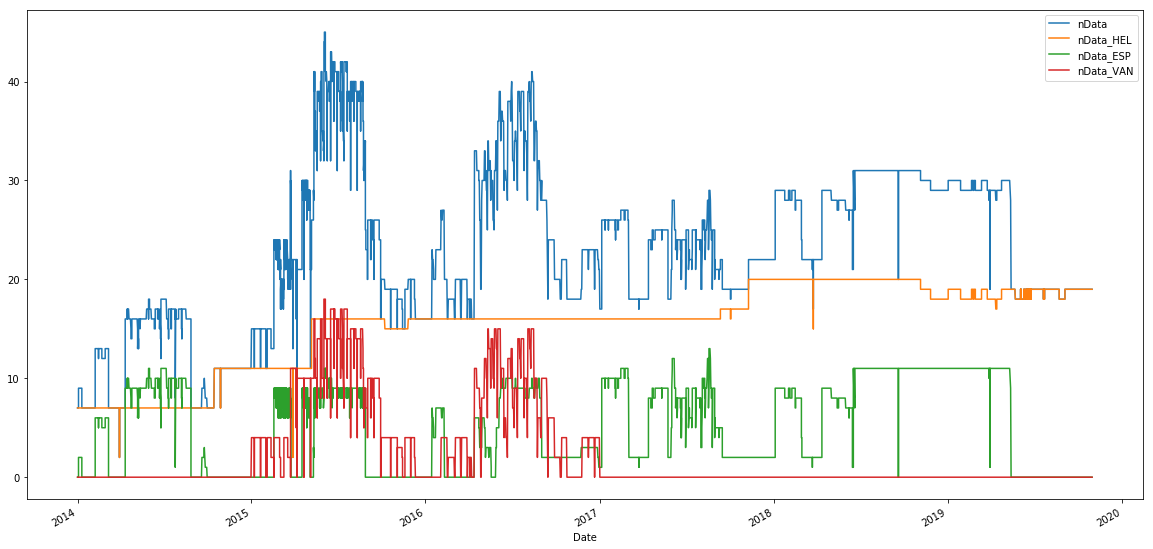

In [40]:
ALL_Bikers=pd.read_csv('All_bikers.csv')
ALL_Bikers=ALL_Bikers.reset_index()
ALL_Bikers['Date']=pd.to_datetime(ALL_Bikers['Date'])
ALL_Bikers=ALL_Bikers.set_index('Date')
ALL_Bikers=ALL_Bikers.iloc[:,1:]

ax=ALL_Bikers.plot(y="nData", figsize=[20,10])
ALL_Bikers.plot(ax=ax,y='nData_HEL')
ALL_Bikers.plot(ax=ax,y='nData_ESP')
ALL_Bikers.plot(ax=ax,y='nData_VAN')

plt.show()
cIndex_Vantaa=pd.Index(['Weekday', 'Asolanvayla P', 'Asolanvayla E', 'Hakunilantie P',
       'Hakunilantie E', 'Kyytitie I', 'Kyytitie L', 'Kaislaranta P',
       'Kaislaranta E', 'Kuusijarvi P', 'Kuusijarvi E', 'Kytopuisto P',
       'Kytöpuisto E', 'Pellas I', 'Pellas L', 'Simonkylantie P',
       'Simonkylantie E', 'Solkikuja I', 'Solkikuja L', 'Vanha Porvoontie P',
       'Vanha Porvoontie E', 'Vantaanlaaksontie P', 'Vantaanlaaksontie E',
       'Ylastontie I', 'Ylastontie L'],
      dtype='object')
cIndex_Expoo=pd.Index(['Espoon portti (Eco-Counter)', 'Espoonlahdenraitti (Eco-Counter)',
       'Gallen-Kallela (Eco-Counter)', 'Gallen-Kallelan tie (DSL10)',
       'Haukilahti (Viacount)', 'Kalevalantien alikulku (DSL10)',
       'Keha I, Laajalahti (DSL10)', 'Keha I, Laajalahti (Eco-counter)',
       'Keilaniemi, Keilaterassi (Viacount)',
       'Keskuspuisto, etelahaara, ita (Viacount 2)',
       'Keskuspuisto, etelahaara, lansi (Viacount 2)',
       'Keskuspuisto, Grimangen (Viacount 2)',
       'Keskuspuisto, Mossenkar (Viacount 2)', 'Kiltapolku (Viacount 2)',
       'Kiltaraitti, etela (Viacount 2)',
       'Kiltaraitti, pohjoinen (Viacount 2)', 'Kirkkojarventie (DSL10)',
       'Kivenlahden uimaranta (Viacount)', 'Kivenlahti (Viacount)',
       'Lansivayla (Eco-counter)', 'Lansivayla, Karhusaari (DSL10)',
       'Martinsillantie (DSL10)', 'Merituulentie (DSL10)',
       'Olarinkatu (Eco-Counter)', 'Otaniemi, Otaranta (Viacount)',
       'Pitkajarventie (DSL10)', 'Pohjantien ylikulku (DSL10)',
       'Pohjantien ylikulku (Eco-Counter)', 'Pohjantien ylikulku (Viacount 2)',
       'Paivankestamonpolku, Kera (Eco-Counter)',
       'Rantaradanraitti, Helsingin raja (Viacount 2)', 'Soukka (Viacount)',
       'Suomenlahdentie (Eco-Counter)',
       'Suomenlahdentie, etelainen (viacount)',
       'Suomenlahdentie, pohjoinen (Viacount)',
       'Tapiola,Lansituulenkuja (Eco-Counter)',
       'Turuntie, Rantaradanreitti (Eco-Counter)',
       'Vihdintie, Kalajarven itapuoli (Viacount 2)',
       'Vihdintie, Uusmaki (DSL10)', 'Ylismaentie,Suurpelto (Eco-Counter)'],
      dtype='object')
cIndex_Helsinki=pd.Index(['Auroransilta', 'Etelaesplanadi', 'Huopalahti (station)',
       'Kaisaniemi/Elaintarhanlahti', 'Kaivokatu', 'Kulosaari bridge south',
       'Kulosaaren silta po. ', 'Kuusisaarentie', 'Kapyla, Pohjoisbaana',
       'Lauttasaarin bridge south side', 'Merikannontie',
       'Munkkiniemi bridge south side', 'Munkkiniemi bridge north side',
       'Heperia park/Ooppera', 'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Lauttasaari bridge north side', 'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')

In [25]:
ALL_Bikers.loc[ALL_Bikers.nData>30].plot(y='nData')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51216 entries, 2014-01-01 to 2019-10-31
Data columns (total 92 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Time                                           51216 non-null  object 
 1   Weekday                                        51216 non-null  object 
 2   pyhapaiva                                      51216 non-null  bool   
 3   nData                                          51216 non-null  int64  
 4   nData_VAN                                      51216 non-null  int64  
 5   nData_ESP                                      51216 non-null  int64  
 6   nData_HEL                                      51216 non-null  int64  
 7   Auroransilta                                   17330 non-null  float64
 8   Etelaesplanadi                                 50546 non-null  float64
 9   Huopalahti (station)             